In [1]:
import pandas as pd

Učitavamo anotacione fajlove svih članova tima i normirano nazive kolona

In [186]:
df_Boris = pd.read_csv('data/Boris/Boris_anotirano_v2.csv')
boris_columns = df_Boris.columns

df_Branislav = pd.read_csv('data/Branislav/annotation_matrix_Branislav.csv', names=boris_columns, header=0)
df_Zorana = pd.read_csv('data/Zorana/annotation_matrix_Zorana_konacno.csv', names=boris_columns, header=0)
df_Nikola = pd.read_csv('data/Nikola/anotaciona_konacna2_Nikola.csv', names=boris_columns, header=0)

Spajamo anotacione data frameove u jedan dataframe

In [188]:
df_merged = df_Boris.append(
    df_Branislav
).append(
    df_Zorana
).append(
    df_Nikola
)

df_merged = df_merged.dropna()

In [238]:
len(df_merged)

1556

In [189]:
df_merged.head()

,pair_id,comment,Komentar,code,upit\n,pretvaranje int u string\n,red sa prioritetom\n,pretvaranje string u datum\n,sortiranje string liste\n,čuvanje liste u datoteku\n,...,slanje binarnih podataka preko seriske veze\n,otpakovanje podataka iz tekstualne datoteke\n,pozicije podstingova u stringu\n,čitanje elemenata iz html-a - <td>\n,oduzimanje medijana iz svake kolone\n,uklanjanja zaglavlja prilikom spajanja nekoliko datoteka\n,parsiranje query stringa u url-u\n,rangiranje fazi članova na osnovu stepena podudaranja\n,izlaz u html datoteku\n,kako efikasno pročitati .csv datoteku
0,BookStackApp_BookStack_ActivityService_740,Get a new activity instance for the current u...,Daj novu instancu aktivnosti za trenutnog kori...,protected function newActivityForUser(stri...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BookStackApp_BookStack_CommentRepo_753,Update an existing comment.\n,Osveži postojeći komentar.,"public function update(Comment $comment, s...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BookStackApp_BookStack_CommentRepo_754,Delete a comment from the system.\n,Obriši komentar iz sistema.,public function delete(Comment $comment) ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BookStackApp_BookStack_Comment_747,Check if a comment has been updated since cre...,Provera da li je komentar menjan od kada je na...,public function isUpdated(): bool { ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BookStackApp_BookStack_helpers_731,Check if current user is a signed in user.\n,Provera da li je korisnik prijavljen,function signedInUser(): bool{ return auth(...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df_merged.to_csv('./data/annotation_merged.csv')

## Ispitivanje učestanosti upita

In [192]:
descriptive_columns = ['pair_id', 'comment', 'Komentar', 'code']
queries = df_merged.drop(columns=descriptive_columns, inplace=False)
queries.head(1)

,upit\n,pretvaranje int u string\n,red sa prioritetom\n,pretvaranje string u datum\n,sortiranje string liste\n,čuvanje liste u datoteku\n,postgresql konekcija\n,konfuziona matrica\n,postavljanje radnog direktorijuma\n,grupisanje po izbrojanim podacima\n,...,slanje binarnih podataka preko seriske veze\n,otpakovanje podataka iz tekstualne datoteke\n,pozicije podstingova u stringu\n,čitanje elemenata iz html-a - <td>\n,oduzimanje medijana iz svake kolone\n,uklanjanja zaglavlja prilikom spajanja nekoliko datoteka\n,parsiranje query stringa u url-u\n,rangiranje fazi članova na osnovu stepena podudaranja\n,izlaz u html datoteku\n,kako efikasno pročitati .csv datoteku
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
query_count = queries.fillna(0).astype(bool).sum(axis=0)

In [194]:
rare_queries = query_count[query_count < 1]
len(rare_queries)

16

In [195]:
rare_queries.to_csv('Retki upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [196]:
not_so_rare = rare_queries[rare_queries > 2]
not_so_rare.to_csv('Ne toliko retki upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [197]:
query_count.to_csv('Upiti.csv')

/Users/boris_majic/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [198]:
for key in query_count.keys():
    query_count[key.strip().lower()] = query_count.pop(key)
query_count.pop('upit')

72

In [199]:
import seaborn as sns

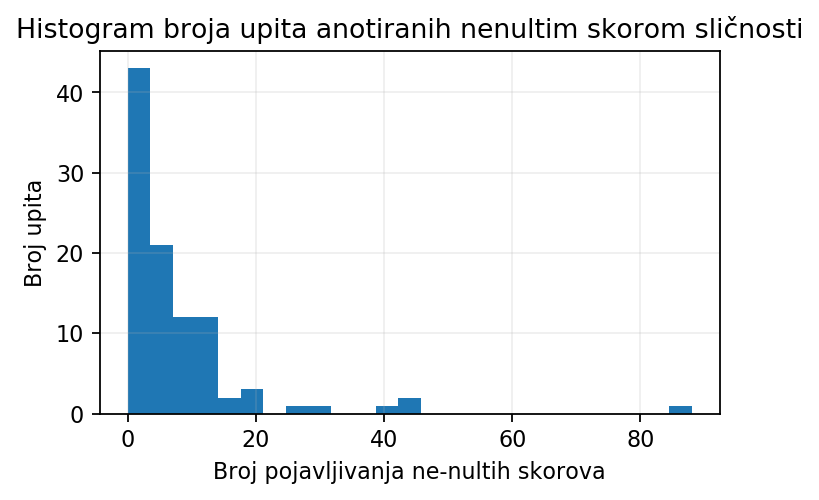

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3), dpi=160)
plt.hist(query_count.values, bins = 25)
plt.xlabel('Broj pojavljivanja ne-nultih skorova')
plt.ylabel('Broj upita')
plt.title('Histogram broja upita anotiranih nenultim skorom sličnosti')
plt.grid(alpha=0.2)

plt.show()

# Priprema za klasifikaciju

In [365]:
# Transformisanje podataka u oblik prigodan za klasifikaciju

lista_uzoraka = []
upiti = [column.strip() for column in queries.columns]
df_merged.rename(columns={column: column.strip() for column in queries.columns},inplace=True)

for i, row in df_merged.iterrows():
    for upitid, upit in enumerate(upiti[1:]):
        lista_uzoraka.append([row['pair_id'], upitid, row['Komentar'], upit, row[upit]])
        
df_uzorci = pd.DataFrame(
    lista_uzoraka, columns = ['PairID', 'QueryID','Komentar', 'Upit', 'Vrednost']
).astype(
    {
        'PairID': str,
        'QueryID': int,
        'Komentar': str,
        'Upit': str,
        'Vrednost': int
    }
)

df_uzorci.head(3)

,PairID,QueryID,Komentar,Upit,Vrednost
0,BookStackApp_BookStack_ActivityService_740,0,Daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0
1,BookStackApp_BookStack_ActivityService_740,1,Daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0
2,BookStackApp_BookStack_ActivityService_740,2,Daj novu instancu aktivnosti za trenutnog kori...,pretvaranje string u datum,0


## Predobrada podataka

### Normalizacija tekstova na mala slova

In [366]:
df_uzorci['Komentar'] = df_uzorci['Komentar'].apply(lambda x: x.lower())
df_uzorci['Upit'] = df_uzorci['Upit'].apply(lambda x: x.lower())

### Stemovanje reči

Stemovanje se vrši stemerom za hrvatski jezik

In [367]:
import re
import sys
from Croatian_stemmer import Croatian_stemmer as stemmer

In [368]:
pravila=[
    re.compile(r'^('+osnova+')('+nastavak+r')$') 
    for osnova, nastavak in [e.strip().split(' ') for e in open('Croatian_stemmer/rules.txt')]
]

transformacije = [e.strip().split('\t') for e in open('Croatian_stemmer/transformations.txt')]

stop = set(['biti','jesam','budem','sam','jesi','budeš','si','jesmo','budemo','smo','jeste','budete','ste','jesu','budu','su','bih','bijah','bjeh','bijaše','bi','bje','bješe','bijasmo','bismo','bjesmo','bijaste','biste','bjeste','bijahu','biste','bjeste','bijahu','bi','biše','bjehu','bješe','bio','bili','budimo','budite','bila','bilo','bile','ću','ćeš','će','ćemo','ćete','želim','želiš','želi','želimo','želite','žele','moram','moraš','mora','moramo','morate','moraju','trebam','trebaš','treba','trebamo','trebate','trebaju','mogu','možeš','može','možemo','možete'])

def tokenize(text):
    new_text = ''

    for token in re.findall(r'\w+',text ,re.UNICODE):
        if token.lower() in stop:
            try:
                new_text += token.lower() + ' '
            except TypeError:
                print(type(token))
                print(token)
                raise(TypeError)
            continue
        new_text += stemmer.korjenuj(
            stemmer.transformiraj(token.lower(), transformacije), pravila
        ) + ' '
    return new_text


In [369]:
df_uzorci['Stem'] = df_uzorci['Komentar'].apply(lambda x: tokenize(x))
df_uzorci['StemUpit'] = df_uzorci['Upit'].apply(lambda x: tokenize(x))

In [370]:
df_uzorci.head(3)

,PairID,QueryID,Komentar,Upit,Vrednost,Stem,StemUpit
0,BookStackApp_BookStack_ActivityService_740,0,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string
1,BookStackApp_BookStack_ActivityService_740,1,daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0,daj nov instanc aktivnost za trenutn korisnik,red sa prioritet
2,BookStackApp_BookStack_ActivityService_740,2,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje string u datum,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj string u datum


### Filtriranje po frekvenciji reci

Filtriranje se vrši tako što se pravi rečnik svih reči koje se pojavljuju. Zatim se prolazi kroz sve komentare i upite i gleda se koliko se reči u njima pojavljuju. Postavlja se pitanje, da li izbacivati samo one reči koje su jako česte i samim time ne donose veliku informaciju ili reči koje se pojavljuju jako retko i samim time nose veliku količinu informacije. Odlučeno je da se jako retke reči neće izbacivati zbog prirode upita, koji mogu da se sastoje i samo iz jedne, česte i vrlo specifične reči, te bi izbacivanje ovakvih reči onemogućilo pretragu ovakvih upita. Upiti koji koriste isključivo jako česte reči su sami po sebi neodređeni.

Rečnik se pravi na osnovu stemova.

In [371]:
word_dict = {}
for _, row in df_merged.iterrows():
    try:
        for word in tokenize(row['Komentar'].strip()).split(' '):
            if word.isnumeric() or len(word) < 2:
                continue
            if not word in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
            if word == 'inicijaliz':
                print(row)
    except:
        continue

for query in df_merged.columns:
    try:
        for word in tokenize(query).strip().split(' '):
            if word.isnumeric() or len(word) < 2:
                continue
            if not word in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
            if word == 'inicijaliz':
                print(row)
    except:
        continue
    
query_word_dict = {}
for query in df_merged.columns:
    for word in tokenize(query).split(' '):
        if word.isnumeric() or len(word) < 2:
            continue
        if not word in query_word_dict:
            query_word_dict[word] = 1
        else:
            query_word_dict[word] += 1

pair_id                                                                  Intervention_image_AbstractColor_408
comment                                                      Initiates color object from given R, G, B and...
Komentar                                                    Inicijalizu objekat boje od zadatih R, G, B i ...
code                                                            abstract public function initFromRgba($r, ...
upit                                                                                                        0
                                                                                  ...                        
uklanjanja zaglavlja prilikom spajanja nekoliko datoteka                                                    0
parsiranje query stringa u url-u                                                                            0
rangiranje fazi članova na osnovu stepena podudaranja                                                       0
izlaz u ht

In [372]:
# Koliko imamo jedinstvenih reči
len(word_dict)

3067

In [373]:
word_lengths = list(word_dict.values())
word_lengths.sort()

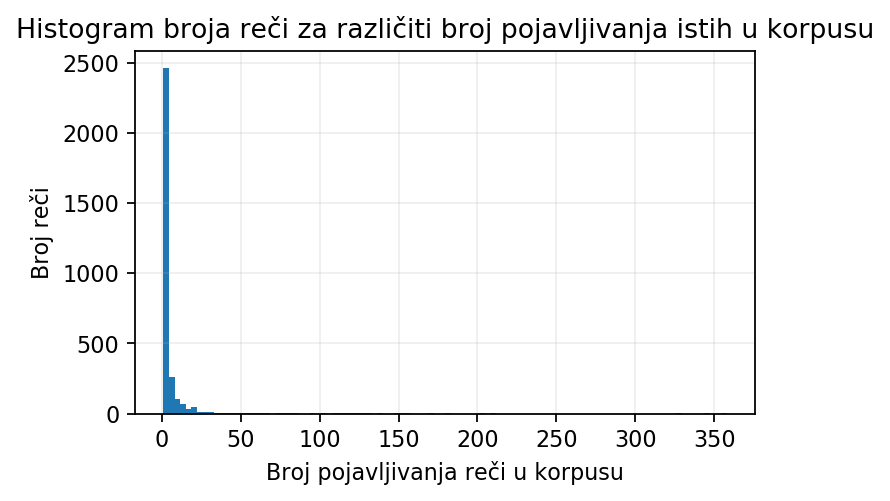

In [408]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3), dpi=160)
plt.hist(word_lengths, bins = 100)
plt.xlabel('Broj pojavljivanja reči u korpusu')
plt.ylabel('Broj reči')
plt.title('Histogram broja reči za različiti broj pojavljivanja istih u korpusu')
plt.grid(alpha=0.2)

plt.show()

In [374]:
# Izdvajanje retkih i čestih reči
rare_words = [word for word in word_dict.keys() if word_dict[word] <= word_lengths[round(0.1*len(word_dict))]]
common_words = [word for word in word_dict.keys() if word_dict[word] >= word_lengths[round(0.95*len(word_dict))]]

# One česte reči koje su delovi upita zadržavamo i koje imaju više od dva slova. Veznike ipak želimo da izbacimo
common_words = [word for word in common_words if word not in query_word_dict or len(word) < 3]

In [375]:
common_words[:10]

['nov', 'instanc', 'za', 'korisnik', 'iz', 'prover', 'da', 'li', 'je', 'od']

In [376]:
def broj_istih_reci_bez_ponavljanja(tekst1, tekst2):
    reci_tekst1 = set(tekst1.strip().split(' '))
    reci_tekst2 = set(tekst2.strip().split(' '))
    word_counter = 0
    for rec in reci_tekst1:
        if rec in reci_tekst2:
            word_counter += 1
#             print("{} - {} - {}".format(tekst1, tekst2, rec))
    return word_counter

In [377]:
def broj_istih_reci_sa_ponavljanjem(tekst1, tekst2):
    reci_tekst1 = set(tekst1.strip().split(' '))
    reci_tekst2 = tekst2.strip().split(' ')
    word_counter = 0
    for rec in reci_tekst2:
        if rec in reci_tekst1:
            word_counter += 1
    return word_counter

In [378]:
def broj_zajednickih_bigrama(tekst1, tekst2):
    reci_t1 = tekst1.strip().split(' ')
    bigrami_t1 = [reci_t1[i] + ' ' + reci_t1[i+1] for i in range(len(reci_t1)-1)]
    reci_t2 = tekst2.strip().split(' ')
    bigrami_t2 = [reci_t2[i] + ' ' + reci_t2[i+1] for i in range(len(reci_t2)-1)]
    counter = 0
    for bigram in bigrami_t1:
        if bigram in bigrami_t2:
            counter += 1
            
    return counter

In [379]:
def ukloni_ceste_reci(tekst, ceste_reci):
    reci = [rec for rec in tekst.strip().split(' ') if rec not in ceste_reci]
    return ' '.join(reci)
    

In [387]:
df_uzorci['StemFiltered'] = df_uzorci['Stem'].apply(lambda x: ukloni_ceste_reci(x, common_words))
df_uzorci['StemUpitFiltered'] = df_uzorci['StemUpit'].apply(lambda x: ukloni_ceste_reci(x, common_words))
df_uzorci['ZajednickeStem'] = df_uzorci.apply(
    lambda x: broj_istih_reci_bez_ponavljanja(x['Stem'], x['StemUpit']),
    axis=1
)
df_uzorci['ZajednickeOriginal'] = df_uzorci.apply(
    lambda x: broj_istih_reci_bez_ponavljanja(x['Komentar'], x['Upit']),
    axis=1
)

df_uzorci['Bigrami'] = df_uzorci.apply(
    lambda x: broj_zajednickih_bigrama(x['Stem'], x['StemUpit']),
    axis=1
)
df_uzorci['BrojReciStem'] = df_uzorci['Stem'].apply(lambda x: len(x.strip().split(' ')))
df_uzorci['BrojReciUpit'] = df_uzorci['StemUpit'].apply(lambda x: len(x.strip().split(' ')))

In [388]:
df_uzorci.head(3)

,PairID,QueryID,Komentar,Upit,Vrednost,Stem,StemUpit,StemFiltered,StemUpitFiltered,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit
0,BookStackApp_BookStack_ActivityService_740,0,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string,daj aktivnost trenutn,pretvaranj int u string,0,0,0,7,4
1,BookStackApp_BookStack_ActivityService_740,1,daj novu instancu aktivnosti za trenutnog kori...,red sa prioritetom,0,daj nov instanc aktivnost za trenutn korisnik,red sa prioritet,daj aktivnost trenutn,red prioritet,0,0,0,7,3
2,BookStackApp_BookStack_ActivityService_740,2,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje string u datum,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj string u datum,daj aktivnost trenutn,pretvaranj string u datum,0,0,0,7,4


## TF - IDF - TIFDF

In [335]:
unique_words = list(word_dict.keys())

In [474]:
def calc_bow(text, words):
    tokens = tokenize(text).split()
    return [sum([a == word for a in tokens]) for word in words]

def calc_tf(text, words):
    num_words = len(tokenize(text).split())
    return [c/num_words for c in calc_bow(text, words)]
    
def calc_tfidf(text, words, idf):
    curr_tf = calc_tf(text, words)
    return [tf*idf for tf, idf in zip(curr_tf, idf)]


In [461]:
bag_of_words = {
    row['pair_id']: calc_bow(row['Komentar'], unique_words) for i, row in df_merged.iterrows()
}
bag_of_words_upiti = {
    i: calc_bow(upit, unique_words) for i, upit in enumerate([query.strip() for query in queries.columns][1:])
}

df_BOW = pd.DataFrame.from_dict(bag_of_words, orient='index', columns=unique_words)
df_BOWQ = pd.DataFrame.from_dict(bag_of_words_upiti, orient='index', columns=unique_words)

In [ ]:
word_occurances = [(sum(df_BOW[word] > 0) + sum(df_BOWQ[word] > 0)) for word in unique_words]
words_to_drop = [unique_words[i] for i, broj in enumerate(word_occurances) if broj == 0]

In [340]:
df_BOW.head(3)

,daj,nov,instanc,aktivnost,za,trenutn,korisnik,osvež,postojeć,komentar,...,gz,zapakovan,slanj,serisk,otpakovanj,podsting,rangiranj,faz,članov,efikasn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [464]:
word_occurances = [(sum(df_BOW[word] > 0) + sum(df_BOWQ[word] > 0)) for word in unique_words]
words_to_drop = [unique_words[i] for i, broj in enumerate(word_occurances) if broj == 0]

In [465]:
df_BOWQ.drop(words_to_drop, inplace=True, axis=1)
df_BOW.drop(words_to_drop, inplace=True, axis=1)
unique_words = [word for word in unique_words if word not in words_to_drop]

In [345]:
tf = {}
for key in bag_of_words:
    curr_sum = sum(df_BOW.loc[key])
    tf[key] = [c/curr_sum for c in df_BOW.loc[key].values]
    
tf_df = pd.DataFrame.from_dict(tf, orient='index', columns=unique_words)

In [347]:
tf_df.head()

,daj,nov,instanc,aktivnost,za,trenutn,korisnik,osvež,postojeć,komentar,...,gz,zapakovan,slanj,serisk,otpakovanj,podsting,rangiranj,faz,članov,efikasn
BookStackApp_BookStack_ActivityService_740,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_CommentRepo_753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_CommentRepo_754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_Comment_747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_helpers_731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
tf_upiti = {}

for key in bag_of_words_upiti:
    curr_sum = sum(df_BOWQ.loc[key])
    tf_upiti[key] = [c/curr_sum for c in df_BOWQ.loc[key].values]

tf_dfQ = pd.DataFrame.from_dict(tf_upiti, orient='index', columns=unique_words)

In [349]:
tf_dfQ.head(3)

,daj,nov,instanc,aktivnost,za,trenutn,korisnik,osvež,postojeć,komentar,...,gz,zapakovan,slanj,serisk,otpakovanj,podsting,rangiranj,faz,članov,efikasn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
number_of_documents = len(df_merged)
idf = [np.log(number_of_documents/(sum(df_BOW[word] > 0) + sum(df_BOWQ[word] > 0))) for word in unique_words]

In [352]:
tfidf = tf_df.copy().multiply(idf, axis=1)
tfidf.head()

,daj,nov,instanc,aktivnost,za,trenutn,korisnik,osvež,postojeć,komentar,...,gz,zapakovan,slanj,serisk,otpakovanj,podsting,rangiranj,faz,članov,efikasn
BookStackApp_BookStack_ActivityService_740,0.820062,0.522999,0.458106,0.893037,0.249153,0.386498,0.645237,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_CommentRepo_753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.449958,2.083754,1.717550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_CommentRepo_754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_Comment_747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.515265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BookStackApp_BookStack_helpers_731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.752777,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
tfidfQ = tf_dfQ.copy().multiply(idf, axis=1)
tfidfQ.head()

,daj,nov,instanc,aktivnost,za,trenutn,korisnik,osvež,postojeć,komentar,...,gz,zapakovan,slanj,serisk,otpakovanj,podsting,rangiranj,faz,članov,efikasn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
# Sada treba napraviti obeležja od kosinusnih proizvoda

In [354]:
def cosine_sim(v1, v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))


In [389]:
df_uzorci['BOW'] = df_uzorci.apply(
    lambda x: cosine_sim(df_BOW.loc[x['PairID']], df_BOWQ.loc[x['QueryID']]),
    axis=1
)

In [390]:
df_uzorci['TF'] = df_uzorci.apply(
    lambda x: cosine_sim(tf_df.loc[x['PairID']], tf_dfQ.loc[x['QueryID']]),
    axis=1
)

In [391]:
df_uzorci['TFIDF'] = df_uzorci.apply(
    lambda x: cosine_sim(tf_df.loc[x['PairID']], tf_dfQ.loc[x['QueryID']]),
    axis=1
)

In [395]:
df_uzorci.to_csv('All_Data.csv')

# Klasifikacija

In [361]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, precision_recall_fscore_support

Za klasifikaciju nije neophodno izvršavati prethodne ćelije. Klasifikacija polazi od tačke u kojoj se koristi prethodno generisana matrica obeležja.

In [ ]:
df_uzorci = pd.read_csv('All_Data.csv')

In [392]:
df_uzorci.head(1)

,PairID,QueryID,Komentar,Upit,Vrednost,Stem,StemUpit,StemFiltered,StemUpitFiltered,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit,BOW,TF,TFIDF
0,BookStackApp_BookStack_ActivityService_740,0,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string,daj aktivnost trenutn,pretvaranj int u string,0,0,0,7,4,0.0,0.0,0.0


In [431]:
### Podela podataka na obeležja i ciljeve

In [393]:
X = df_uzorci[['ZajednickeStem', 'ZajednickeOriginal', 'Bigrami', 'BrojReciStem', 'BrojReciUpit', 'BOW', 'TF', 'TFIDF']]
y = df_uzorci['Vrednost']

In [432]:
### Podela podataka na skup za obučvanje i testiranje

In [394]:
# Podela podataka na skup za obučavanje i skup za testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
# Skaliranje i normalizacija podataka
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistička regresija

In [423]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced').fit(X_train_scaled, y_train)


/Users/boris_majic/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[[23708  2422  3983   541]
 [   43    16    17    27]
 [   18     1     7     6]
 [    7     1     4     8]]


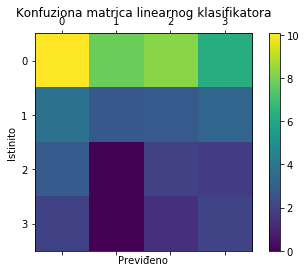

In [424]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test_scaled)

labels = [0,1,2,3]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(np.log(cm))
plt.title('Konfuziona matrica linearnog klasifikatora')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previđeno')
plt.ylabel('Istinito')
plt.show()


# confusion_matrix(y_test, y_pred)

In [425]:
from sklearn.metrics import classification_report

In [426]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.997     0.773     0.871     30654
           1      0.007     0.155     0.013       103
           2      0.002     0.219     0.003        32
           3      0.014     0.400     0.027        20

    accuracy                          0.771     30809
   macro avg      0.255     0.387     0.228     30809
weighted avg      0.992     0.771     0.867     30809



## Multinomijalni naivni Bajes

In [428]:
from sklearn.naive_bayes import MultinomialNB

In [636]:
MNB = {}
classes = [0,1,2,3]
number_of_unique_words = len(unique_words)
for upit in upiti[1:]:
    # Priprema tabele
    MNB[upit.lower()] = {}
    curr_df = df_uzorci[df_uzorci['Upit'] == upit.lower()].copy()[['Komentar', 'Upit', 'StemFiltered', 'Vrednost']]
    curr_apriori = {cl: sum(curr_df['Vrednost'] == cl)/len(curr_df) for cl in classes}
    MNB[upit.lower()]['apriori'] = curr_apriori.copy()
    
    
    prob = {}
    for cl in classes:
        class_comments = curr_df[curr_df['Vrednost'] == cl].copy()['StemFiltered'].values
        
        a = 0
        prob[cl] = {}
        
        # Koliko se ukupno reči pojavljuje u klasi
        number_of_words_in_class = 0
        for comment in class_comments:
            number_of_words_in_class += len(comment.split())
            
        for word in unique_words:
            # koliko se puta pojavljuje reč u klasi:
            occurances_in_class = 0
            for item in class_comments:
                for curr_word in item.split():
                    if word == curr_word:
                        occurances_in_class += 1
                
            prob[cl][word] = (1 + occurances_in_class)/(number_of_unique_words + number_of_words_in_class)
    MNB[upit.lower()]['verovatnoce'] = prob.copy()
            
    print(upit)
    

pretvaranje int u string
red sa prioritetom
pretvaranje string u datum
sortiranje string liste
čuvanje liste u datoteku
postgresql konekcija
konfuziona matrica
postavljanje radnog direktorijuma
grupisanje po izbrojanim podacima
binomna raspodela
aes šifrovanje
linearna regresija
vreme tolerisanja za prijem na soketu
upisivanje u csv datoteku
pretvaranje decimalnog u heksadecimalni broj
izvoz podataka u excel
dijagram rasejanja
pretvaranje json u csv
lepo ispiši json
zamena delova datoteke
klasterizacija metodom k-srednjih vrednosti
povezivanje na sql server
html šifrovan string
određivanje proteklog vremena korišćenjem časovnika
parsiranje binarne datoteke u prilagođenu klasu
dohvatanje trenutne ip adrese
pretvaranje int u bool
isčitavanje tekstualne datoteke liniju po liniju
dohvatanje putanje izvršavanja
odprema json datoteke pomoću HttpClient POST zahteva
dohvatanje unutrašnjeg svojstva html taga
pretvaranje string u broj
formatiranje datuma
nepromenjivi (readonly) niz
filtriranje n

In [650]:
def calc_probability_non_weighted(komentar, upit):
    classes = [0,1,2,3]
    curr_class = 0
    max_prob = 0
    for cl in classes:
        initial_prob = MNB[upit.lower()]['apriori'][cl]
        for word in tokenize(komentar.lower()).split():
            if word in unique_words:
                initial_prob = initial_prob * MNB[upit.lower()]['verovatnoce'][cl][word]
        if initial_prob > max_prob:
            max_prob = initial_prob
            curr_class = cl
    return curr_class
        

In [668]:
def calc_probability_weighted(komentar, upit):
    classes = [0,1,2,3]
    curr_class = 0
    max_prob = 0
    for cl in classes:
        initial_prob = 1
        for word in tokenize(komentar.lower()).split():
            if word in unique_words:
                initial_prob = initial_prob * MNB[upit.lower()]['verovatnoce'][cl][word]
        if initial_prob > max_prob:
            max_prob = initial_prob
            curr_class = cl
    return curr_class
        

In [664]:
def calc_probability_partially_weighted(komentar, upit):
    classes = [0,1,2,3]
    curr_class = 0
    max_prob = 0
    for cl in classes:
        initial_prob = np.sqrt(MNB[upit.lower()]['apriori'][cl])
        for word in tokenize(komentar.lower()).split():
            if word in unique_words:
                initial_prob = initial_prob * MNB[upit.lower()]['verovatnoce'][cl][word]
        if initial_prob > max_prob:
            max_prob = initial_prob
            curr_class = cl
    return curr_class
        

In [647]:
df_uzorci.head(1)

,PairID,QueryID,Komentar,Upit,Vrednost,Stem,StemUpit,StemFiltered,StemUpitFiltered,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit,BOW,TF,TFIDF
0,BookStackApp_BookStack_ActivityService_740,0,daj novu instancu aktivnosti za trenutnog kori...,pretvaranje int u string,0,daj nov instanc aktivnost za trenutn korisnik,pretvaranj int u string,daj aktivnost trenutn,pretvaranj int u string,0,0,0,7,4,0.0,0.0,0.0


### Ocenjivanje MNB

In [652]:
total_estimates = 0
true_estimates = 0
confusion_matrix = {cl: [0,0,0,0] for cl in classes}
for idx, row in df_uzorci.iterrows():
    procena = calc_probability_non_weighted(row['Komentar'], row['Upit'])
    truth = row['Vrednost']
    confusion_matrix[truth][procena] += 1
    total_estimates += 1
    if procena == truth:
        true_estimates += 1
    if total_estimates % 10000 == 0:
        break
    

In [669]:
wtotal_estimates = 0
wtrue_estimates = 0
wconfusion_matrix = {cl: [0,0,0,0] for cl in classes}
for idx, row in df_uzorci.iterrows():
    procena = calc_probability_weighted(row['Komentar'], row['Upit'])
    truth = row['Vrednost']
    wconfusion_matrix[truth][procena] += 1
    wtotal_estimates += 1
    if procena == truth:
        wtrue_estimates += 1
    if wtotal_estimates % 10000 == 0:
        break
    

In [661]:
ptotal_estimates = 0
ptrue_estimates = 0
pconfusion_matrix = {cl: [0,0,0,0] for cl in classes}
for idx, row in df_uzorci.iterrows():
    procena = calc_probability_partially_weighted(row['Komentar'], row['Upit'])
    truth = row['Vrednost']
    pconfusion_matrix[truth][procena] += 1
    ptotal_estimates += 1
    if procena == truth:
        ptrue_estimates += 1
    if ptotal_estimates % 10000 == 0:
        break
    

In [670]:
wconfusion_matrix

{0: [3780, 2569, 2244, 1370],
 1: [2, 27, 0, 1],
 2: [1, 0, 3, 1],
 3: [0, 0, 0, 2]}

In [662]:
pconfusion_matrix

{0: [7111, 1950, 433, 469],
 1: [11, 18, 0, 1],
 2: [1, 1, 2, 1],
 3: [1, 0, 0, 1]}

In [654]:
confusion_matrix

{0: [8252, 1221, 231, 259],
 1: [15, 14, 0, 1],
 2: [2, 1, 1, 1],
 3: [1, 0, 0, 1]}

## Metoda nosećih vektora

In [478]:
from sklearn.svm import SVC

clf = SVC(gamma='auto', class_weight='balanced', max_iter=100, kernel='poly')

C = [1, 10, 100]
clfs = [SVC(C = c, gamma='auto', class_weight='balanced') for i in range(len(C))]
for i, c in enumerate(C):
    clfs[i] = SVC(C = c, gamma='auto', class_weight='balanced')
    clfs[i].fit(X_train_scaled, y_train)
    print(clfs[i].score(X_test_scaled, y_test))

## Rangiranje

In [490]:
def rangiraj(upit, df, method, idf_vector = None):
    """
    upit se zadaje u obliku stringa
    df je prethodno izračunat dataframe koji sadrži BOW, TF ili TFIDF podatke za korpus
    method je jedno od 'BOW', 'TF' ili 'TFIDF'
    u slučaju da je method='TFIDF', potrebno je priložiti prethodno izračunat vektor IDF
    """
    unique_words = list(df.columns)
    if method == 'BOW':
        curr_vector = calc_bow(upit, unique_words)
    if method == 'TF':
        curr_vector = calc_tf(upit, unique_words)
    if method == 'TFIDF':
        if idf_vector is not None:
            curr_vector = calc_tfidf(upit, unique_words, idf_vector)
        else:
            raise Exception('When using TFIDF, idf_vector must be provided')
        
    ranks = {idx: cosine_sim(curr_vector, vector.values) for idx, vector in df.iterrows()}
    return ranks
        
    

In [491]:
ranks = rangiraj('sortiranje string liste', df_BOW, 'BOW')

## Evaluacija rangiranja

In [499]:
df_eval = df_uzorci[df_uzorci['Vrednost'] > 0].copy()
df_eval.head(3)

,PairID,QueryID,Komentar,Upit,Vrednost,Stem,StemUpit,StemFiltered,StemUpitFiltered,ZajednickeStem,ZajednickeOriginal,Bigrami,BrojReciStem,BrojReciUpit,BOW,TF,TFIDF
976,Intervention_image_AbstractColor_403,85,inicijalizuje objekat boje od celog broja.,pretvoriti uint8 niz u sliku,1,inicijalizuj objekt boj od celog broj,pretvori uint8 niz u slik,celog broj,pretvori uint8 niz u slik,0,0,0,6,5,0.0,0.0,0.0
1075,Intervention_image_AbstractColor_407,85,"inicijalizuje objekat boje od zadate r, g i b ...",pretvoriti uint8 niz u sliku,1,inicijalizuj objekt boj od zada r g i b vrednost,pretvori uint8 niz u slik,zada r g i b vrednost,pretvori uint8 niz u slik,0,0,0,10,5,0.0,0.0,0.0
1174,Intervention_image_AbstractColor_408,85,"inicijalizu objekat boje od zadatih r, g, b i ...",pretvoriti uint8 niz u sliku,1,inicijaliz objekt boj od zadat r g b i a vredn...,pretvori uint8 niz u slik,inicijaliz zadat r g b i a vrednost,pretvori uint8 niz u slik,0,0,0,11,5,0.0,0.0,0.0


In [581]:
# BOW pristup
rank_list = []
for idx, row in df_eval.iterrows():
    zero_pairs = df_uzorci[(df_uzorci['Upit'] == row['Upit']) & (df_uzorci['Vrednost'] == 0)].sample(99)['PairID']
    curr_ranks = rangiraj(row['Upit'], df=df_BOW.loc[np.append(row['PairID'], zero_pairs.values)], method='BOW')
    curr_similarity = curr_ranks[row['PairID']]
    curr_ranks = sorted([(value, key) for key, value in curr_ranks.items() if key in zero_pairs.values], reverse=True)
    
    i = 0
    for rank in curr_ranks:
        if rank[0] <= curr_similarity:
            break
        i += 1
    
    rank_list.append(i)
    

In [585]:
# TF pristup
tf_rank_list = []
for idx, row in df_eval.iterrows():
    zero_pairs = df_uzorci[(df_uzorci['Upit'] == row['Upit']) & (df_uzorci['Vrednost'] == 0)].sample(99)['PairID']
    curr_ranks = rangiraj(row['Upit'], df=tf_df.loc[np.append(row['PairID'], zero_pairs.values)], method='TF')
    curr_similarity = curr_ranks[row['PairID']]
    curr_ranks = sorted([(value, key) for key, value in curr_ranks.items() if key in zero_pairs.values], reverse=True)
    
    i = 0
    for rank in curr_ranks:
        if rank[0] <= curr_similarity:
            break
        i += 1
    
    tf_rank_list.append(i)
    

In [589]:
# TFIDF pristup
tfidf_rank_list = []
for idx, row in df_eval.iterrows():
    zero_pairs = df_uzorci[(df_uzorci['Upit'] == row['Upit']) & (df_uzorci['Vrednost'] == 0)].sample(99)['PairID']
    curr_ranks = rangiraj(row['Upit'], df=tfidf.loc[np.append(row['PairID'], zero_pairs.values)], method='TFIDF', idf_vector=idf)
    curr_similarity = curr_ranks[row['PairID']]
    curr_ranks = sorted([(value, key) for key, value in curr_ranks.items() if key in zero_pairs.values], reverse=True)
    
    i = 0
    for rank in curr_ranks:
        if rank[0] <= curr_similarity:
            break
        i += 1
    
    tfidf_rank_list.append(i)

In [586]:
len(tf_rank_list)

773

In [591]:
np.mean(rank_list)

4.521345407503234